In [81]:
import GAN.models as models
import ganja.io as io
import ganja.utils as utils
import ganja.plotting as plotting
import ganja.preprocessing as preprocessing

In [2]:
from  keras.models import load_model

In [3]:
import os
class Parameters(utils.Parameters):
    
    # dataset to be loaded
    base_folder = utils.param(os.getenv('SCRATCH')+'/ganja/split')
    version = utils.param('nov2_v3')
    compressed = utils.param(False)
    weights = utils.param('weights_nov2_pt.npy') 
    moments = utils.param('moments_nov2.npz')   
    

class MyApp(utils.MyApp):
    classes = utils.List([Parameters])

# Read all parameters above from command line. 
# Note: names are all converted to be all capital
notebook_parameters = Parameters(MyApp()).get_params()

# copy parameters to global scope
globals().update(notebook_parameters)
#DM_OPTS.update( {"loss":LOSS} )
#AM_OPTS.update( {"loss":LOSS} )


notebook_parameters

['']


{'BASE_FOLDER': '/scratch/snx3000/musella/ganja/split',
 'COMPRESSED': False,
 'MOMENTS': 'moments_nov2.npz',
 'VERSION': 'nov2_v3',
 'WEIGHTS': 'weights_nov2_pt.npy'}

In [7]:
import json

with open(BASE_FOLDER+'/'+VERSION+'/train_valid_test.json') as fin:
    split_map = json.loads(fin.read())


In [82]:
test_inputs = {os.path.join(BASE_FOLDER,VERSION) : split_map['test'][:1]}

moments = np.load(MOMENTS.format(VERSION=VERSION))
reco_moments = moments['reco_mean'],moments['reco_std'],0.02
gen_moments = moments['gen_mean'],moments['gen_std'],0.02

weights = np.load(WEIGHTS.format(VERSION=VERSION),encoding='latin1')
weights = weights[0],weights[2:],weights[1]

In [155]:

test_reader = io.Reader(test_inputs,weights,compressed=COMPRESSED)#,gen_moments=gen_moments)


In [156]:
X_test,y_test,w_test = test_reader.get()
#X_unnorm = preprocessing.unnormalize(X_test,*gen_moments)
X_unnorm = X_test

In [ ]:
previous = None

In [179]:
weights = ! ls -t log/baseline_unnorm/*.hdf5
print("\n".join(weights))

latest = weights[0]

log/baseline_unnorm/model-03.hdf5
log/baseline_unnorm/model-02.hdf5
log/baseline_unnorm/model-01.hdf5
log/baseline_unnorm/model-00.hdf5


In [181]:
if latest != previous:
    print('loading model '+latest)
    model = load_model(latest)
    previous = latest

In [182]:
y_pred = model.predict(X_test[:1000,:32,:32])


In [183]:
def show(img,gen,reco,pred):
    # print(row)
    plt.figure(figsize=(10,10))
    plt.subplot(331)
    plt.title("gen")# (pt,eta) = (%1.2g,%1.2g)" % (row.ptGen,row.etaGen) )
    plt.xlabel('$i\eta$')
    plt.ylabel('$i\phi$')    
    plt.imshow(gen[img,:,:,0],cmap='Reds')
    plt.colorbar()
    plt.subplot(332)
    plt.title("reco-gen")# (pt,eta) = (%1.2g,%1.2g)" % (row.pt,row.eta) )
    plt.xlabel('$i\eta$')
    plt.ylabel('$i\phi$')    
    plt.imshow(reco[img,:,:,0]-gen[img,:,:,0],cmap='Reds')
    plt.colorbar()
    plt.subplot(333)
    plt.title("pred-gen")# (pt,eta) = (%1.2g,%1.2g)" % (row.pt,row.eta) )
    plt.xlabel('$i\eta$')
    plt.ylabel('$i\phi$')    
    plt.imshow(pred[img,:,:,0]-gen[img,:,:,0],cmap='Reds')
    plt.colorbar()
    plt.subplot(323)
    mask = (gen[img,:,:,0]>0)
    print(gen[img,:,:,0].min())
    print(mask.any(),(~mask).any())
    plt.title("pred -gen (gen=0)") # reco-true (GeV/area)" )
    plt.xlabel('$i\eta$')
    plt.ylabel('$i\phi$')    
    plt.imshow( (pred[img,:,:,0]-gen[img,:,:,0])*(~mask),cmap='Blues')
    plt.colorbar()
    plt.subplot(324)
    plt.title("pred -gen (gen!=0)") # reco-true (GeV/area)" )
    plt.xlabel('$i\eta$')
    plt.ylabel('$i\phi$')    
    plt.imshow( (pred[img,:,:,0]-gen[img,:,:,0])*(mask),cmap='Blues')
    plt.colorbar()
    plt.subplot(325)
    plt.title("pred -reco (gen=0)") # reco-true (GeV/area)" )
    plt.xlabel('$i\eta$')
    plt.ylabel('$i\phi$')    
    plt.imshow( (pred[img,:,:,0]-reco[img,:,:,0])*(~mask),cmap='Greens')
    plt.colorbar()
    plt.subplot(326)
    plt.title("pred -reco (gen!=0)") # reco-true (GeV/area)" )
    plt.xlabel('$i\eta$')
    plt.ylabel('$i\phi$')    
    plt.imshow( (pred[img,:,:,0]-reco[img,:,:,0])*(mask),cmap='Greens')
    plt.colorbar()
    plt.show()

92
0.0
True True


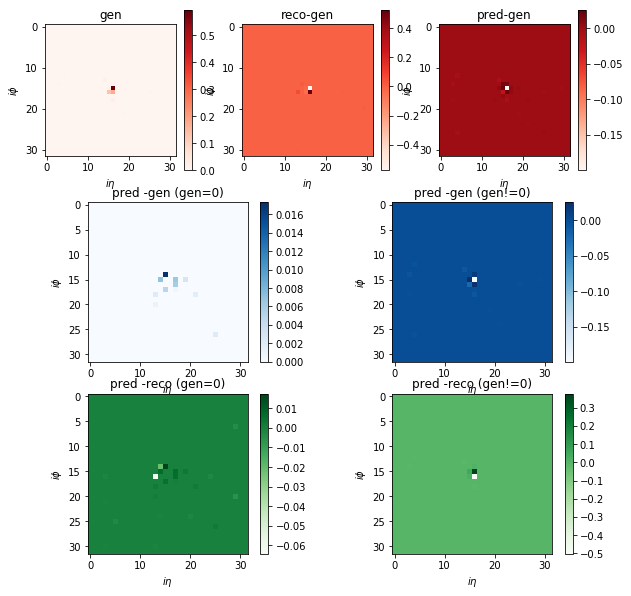

414
0.0
True True


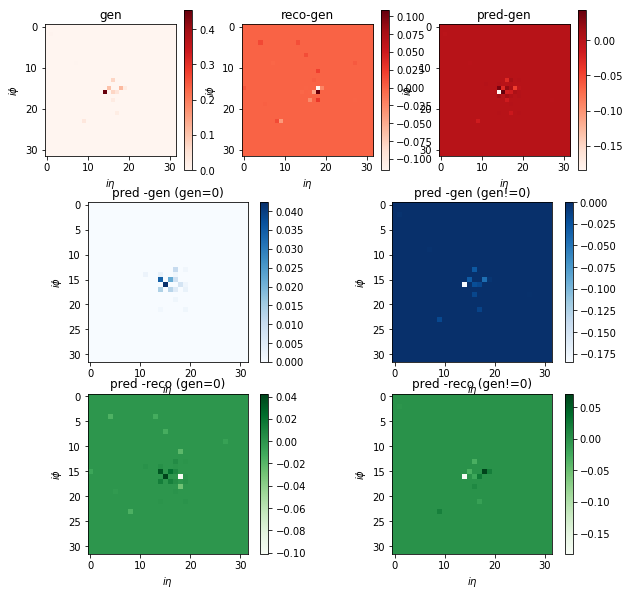

485
0.0
True True


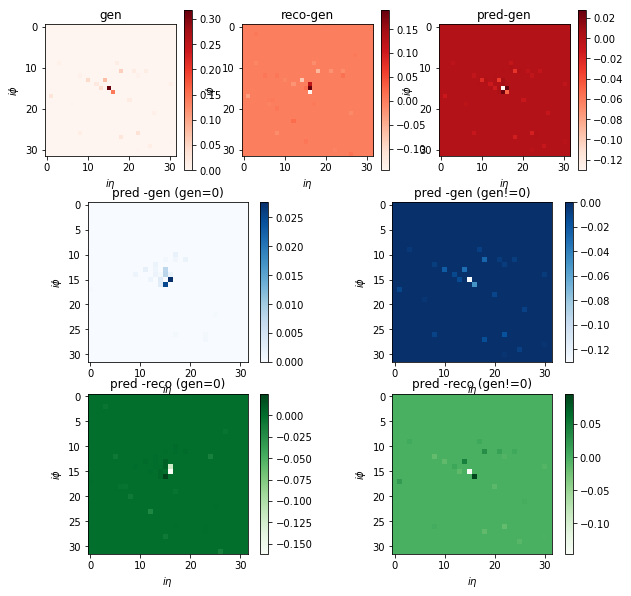

296
0.0
True True


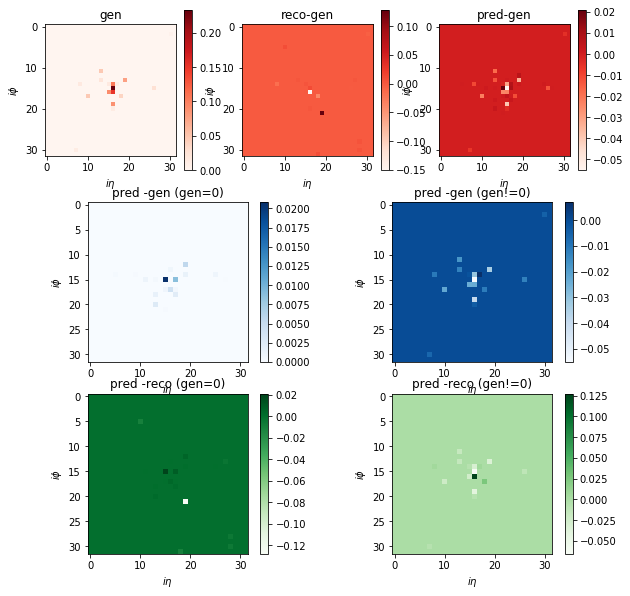

In [185]:
for img in np.random.choice(np.arange(0,y_pred.shape[0]),4):
    print(img)
    show(img,X_unnorm[:,:32,:32],y_test[:,:32,:32],y_pred)